<a href="https://colab.research.google.com/github/shivi2611/Sign-Lang-Translator/blob/main/Sign_lang_interpreter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import and Install libraries


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install mediapipe


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 21.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import os
import time
import cv2
from matplotlib import pyplot as plt
import mediapipe as mp
from google.colab.patches import cv2_imshow

In [ ]:
# import tensorflow as tf
# print("GPU Available:", tf.config.list_physical_devices('GPU'))

GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
# import tensorflow as tf

# # Check available GPUs
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#     try:
#         # Restrict TensorFlow to only use the first GPU
#         tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
#         logical_gpus = tf.config.experimental.list_logical_devices('GPU')
#         print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
#     except RuntimeError as e:
#         # Handle any runtime errors
#         print("Error:", e)


1 Physical GPUs, 1 Logical GPU


# Find Key Points

In [ ]:
 mp_holistic = mp.solutions.holistic # Holistic model
 mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [ ]:
 def draw_styled_landmarks(image, results):
     # Draw face connections
     mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                              )
     # Draw pose connections
     mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                              )
     # Draw left hand connections
     mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                              )
     # Draw right hand connections
     mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                              )

In [ ]:
#def draw_styled_landmarks(image, results):
#    # Draw face connections
#    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
#                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
#                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
#                             )
#    # Draw pose connections
#    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
#                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
#                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
#                             )
#    # Draw left hand connections
#    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
#                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
#                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
#                             )
#    # Draw right hand connections
#    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
#                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
#                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
#                             )

    # tried to update

In [ ]:
 def mediapipe_detection(image, model):
     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
     image.flags.writeable = False                  # Image is no longer writeable
     results = model.process(image)                 # Make prediction
     image.flags.writeable = True                   # Image is now writeable
     image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
     return image, results

In [ ]:
#def mediapipe_detection(images, model):
#    images_rgb = [cv2.cvtColor(image, cv2.COLOR_BGR2RGB) for image in images] # Convert images to RGB
#    images_rgb_flags = [np.copy(image) for image in images_rgb] # Make copies of RGB images
#    for img in images_rgb_flags:
#        img.flags.writeable = False # Make images non-writeable
#    results = [model.process(image) for image in images_rgb_flags] # Make predictions
#    for img in images_rgb_flags:
#        img.flags.writeable = True # Make images writeable again
#    images_bgr = [cv2.cvtColor(image, cv2.COLOR_RGB2BGR) for image in images_rgb_flags] # Convert images back to BGR
#    return images_bgr, results


    # updated

In [ ]:
cap = cv2.VideoCapture('07068.mp4')

In [ ]:
## Initialize Mediapipe holistic model
#mp_holistic = mp.solutions.holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5)
#mp_drawing = mp.solutions.drawing_utils

In [ ]:
# Batch size for processing frames
batch_size = 4
frames_batch = []

while cap.isOpened():
    # Read frames and append to batch
    for _ in range(batch_size):
        ret, frame = cap.read()
        if not ret:
            print("End of video reached")
            break
        frames_batch.append(frame)

    # Perform batch processing
    if frames_batch:
        images_processed, results_batch = mediapipe_detection(frames_batch, mp_holistic)

        # Display processed frames
        for image, results in zip(images_processed, results_batch):
            draw_styled_landmarks(image, results)
            cv2_imshow(image)

        # Clear batch
        frames_batch = []

    key = cv2.waitKey(2)
    if key == ord('q'):
        break

# Release video capture and close all windows
cap.release()
cv2.destroyAllWindows()

# updated

NameError: name 'cap' is not defined

<class 'mediapipe.python.solution_base.SolutionOutputs'>


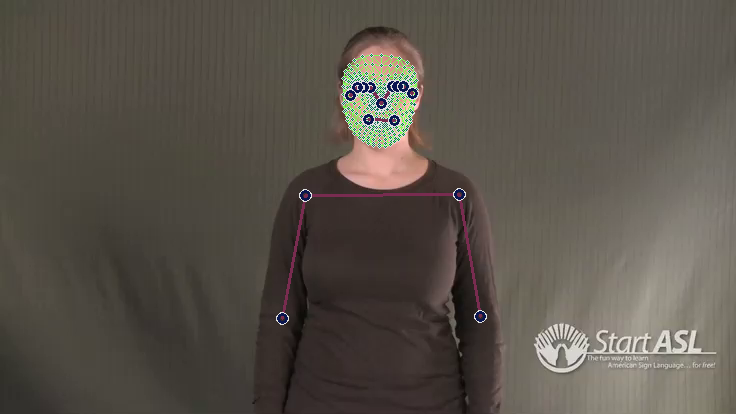

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [ ]:
 flag = 1
 results=0
 frames=[]

 while cap.isOpened():
     with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
         ret, frame = cap.read()

         # Check if the frame was read successfully
         if not ret:
             print("End of video reached")
             break

         # Make detections
         image, results = mediapipe_detection(frame, holistic)
         frames.append(results)
         print(results)
         if flag:
             draw_styled_landmarks(image, results)
             cv2_imshow(image)
             flag = 0
         key = cv2.waitKey(2)
         if key == ord('q'):
             break

 cap.release()
 cv2.destroyAllWindows()


#Extract KeyPoints and save

In [ ]:
print(len(results.face_landmarks.landmark))

468


In [ ]:
print(frames)

[<class 'mediapipe.python.solution_base.SolutionOutputs'>, <class 'mediapipe.python.solution_base.SolutionOutputs'>, <class 'mediapipe.python.solution_base.SolutionOutputs'>, <class 'mediapipe.python.solution_base.SolutionOutputs'>, <class 'mediapipe.python.solution_base.SolutionOutputs'>, <class 'mediapipe.python.solution_base.SolutionOutputs'>, <class 'mediapipe.python.solution_base.SolutionOutputs'>, <class 'mediapipe.python.solution_base.SolutionOutputs'>, <class 'mediapipe.python.solution_base.SolutionOutputs'>, <class 'mediapipe.python.solution_base.SolutionOutputs'>, <class 'mediapipe.python.solution_base.SolutionOutputs'>, <class 'mediapipe.python.solution_base.SolutionOutputs'>, <class 'mediapipe.python.solution_base.SolutionOutputs'>, <class 'mediapipe.python.solution_base.SolutionOutputs'>, <class 'mediapipe.python.solution_base.SolutionOutputs'>, <class 'mediapipe.python.solution_base.SolutionOutputs'>, <class 'mediapipe.python.solution_base.SolutionOutputs'>, <class 'media

In [ ]:
print(frames[2])

<class 'mediapipe.python.solution_base.SolutionOutputs'>


In [ ]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [ ]:
result_test = extract_keypoints(results)

In [ ]:
result_test

array([ 0.50689274,  0.26075888, -0.71528959, ...,  0.        ,
        0.        ,  0.        ])

In [ ]:
for i, frame in enumerate(frames):
    print(frame)
    frames[i] = extract_keypoints(frame)
#np.save('drive/MyDrive/07068', frames)

In [ ]:
print(frames[0])

[ 0.51790619  0.24880081 -0.70261198 ...  0.          0.
  0.        ]


In [ ]:
np.save('drive/MyDrive/demo', frames)

In [ ]:
classList=[]
with open('wlasl_class_list.txt', 'r', encoding='utf-8') as file:
    data2 = file.read()

# Split the data into lines
newData = data2.split('\n')

# Iterate over each line
for word in newData:
    if not word:
        continue
    # Split each line by tab character
    className = word.split('\t')[1]
    classList.append(className)
classList.remove("meaning")
classList.remove("post")
print(classList)

IndexError: list index out of range

In [ ]:
video_path= 'drive/MyDrive/processed_dataset/MP_train_data/book/07068.mp4'
video_frames= os.listdir(video_path)
video=[]
for frame in video_frames:
  frame_path= os.path.join(video_path, frame)
  res = np.load(frame_path)
  video.append(res)
  res=[]
print(video)


[array([ 0.51790619,  0.24880081, -0.70261198, ...,  0.        ,
        0.        ,  0.        ]), array([ 0.52024955,  0.24653818, -0.66812301, ...,  0.        ,
        0.        ,  0.        ]), array([ 0.51764196,  0.24808532, -0.68762183, ...,  0.        ,
        0.        ,  0.        ]), array([ 0.51831275,  0.24543101, -0.70580816, ...,  0.        ,
        0.        ,  0.        ]), array([ 0.52049851,  0.25143242, -0.6393345 , ...,  0.        ,
        0.        ,  0.        ]), array([ 0.52175027,  0.24779171, -0.70877761, ...,  0.        ,
        0.        ,  0.        ]), array([ 0.5200696 ,  0.24638772, -0.61935753, ...,  0.        ,
        0.        ,  0.        ]), array([ 0.51648271,  0.24255234, -0.54747212, ...,  0.        ,
        0.        ,  0.        ]), array([ 0.51840961,  0.24208468, -0.7105605 , ...,  0.        ,
        0.        ,  0.        ]), array([ 0.51550281,  0.24728918, -0.74763262, ...,  0.40560338,
        0.72117418, -0.01054016]), array([ 0

In [ ]:
def process_videos(src_path, dst_path):
  for name in classList:
    #print(name)
    path= os.path.join(src_path, name)
    if not os.path.isdir(path):
      continue
    videos = os.listdir(path)
    if not videos:
      print("No videos found for {name}")
      continue
    for video in videos:
      video_path = os.path.join(path, video)
      print(type(video))
      output_folder= os.path.join(dst_path, name, video)
      os.makedirs(output_folder,exist_ok=True)

      cap = cv2.VideoCapture(video_path)
      frame_no=0
      while cap.isOpened():
          with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
              ret, frame = cap.read()

              # Check if the frame was read successfully
              if not ret:
                  break
              frame_no += 1

              # Make detections
              image, results = mediapipe_detection(frame, holistic)
              frame_data = extract_keypoints(results)

              output_path = os.path.join(output_folder, str(frame_no))
              np.save(output_path, frame_data)

              key = cv2.waitKey(2)
              if key == ord('q'):
                  break

      cap.release()
      cv2.destroyAllWindows()


In [ ]:
process_videos('drive/MyDrive/dataset/train', 'drive/MyDrive/processed_dataset/MP_train_data')


In [ ]:
process_videos('drive/MyDrive/dataset/test', 'drive/MyDrive/processed_dataset/MP_test_data')


In [ ]:
process_videos('drive/MyDrive/dataset/val', 'drive/MyDrive/processed_dataset/MP_val_data')

# Data preprocessing for LSTM

pad videos to 110 frames and create a label map

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from concurrent.futures import ThreadPoolExecutor

path = 'drive/MyDrive/processed_dataset/MP_train_data'
dest = 'drive/MyDrive/LSTM_input/Train'
MAX_WORKERS = 4  # Adjust according to your system's capabilities

def process_video(word, video):
    word_path = os.path.join(path, word)
    video_path = os.path.join(word_path, video)
    video_frames = os.listdir(video_path)
    frames = []
    for frame in video_frames:
        frame_path = os.path.join(video_path, frame)
        res = np.load(frame_path)
        frames.append(res)
    frames = np.array(frames).T
    padded_frames = pad_sequences(frames, maxlen=110, dtype='object', padding='post')
    padded_frames = padded_frames.T
    dest_video_path = os.path.join(dest, f"{word}_{video.split('.')[0]}")  # remove file extension
    np.save(dest_video_path, padded_frames)
    print(f"Processed video: {video}")


# Process videos using ThreadPoolExecutor
with ThreadPoolExecutor(max_workers=MAX_WORKERS) as executor:
    for word in classList:
        videos = os.listdir(os.path.join(path, word))
        for video in videos:
            executor.submit(process_video, word, video)

In [ ]:
label_map = {label:num for num, label in enumerate(classList)}
print(label_map)

{'book': 0, 'drink': 1, 'computer': 2, 'before': 3, 'chair': 4, 'go': 5, 'clothes': 6, 'who': 7, 'candy': 8, 'cousin': 9, 'deaf': 10, 'fine': 11, 'help': 12, 'no': 13, 'thin': 14, 'walk': 15, 'year': 16, 'yes': 17, 'all': 18, 'black': 19, 'cool': 20, 'finish': 21, 'hot': 22, 'like': 23, 'many': 24, 'mother': 25, 'now': 26, 'orange': 27, 'table': 28, 'thanksgiving': 29, 'what': 30, 'woman': 31, 'bed': 32, 'blue': 33, 'bowling': 34, 'can': 35, 'dog': 36, 'family': 37, 'fish': 38, 'graduate': 39, 'hat': 40, 'hearing': 41, 'kiss': 42, 'language': 43, 'later': 44, 'man': 45, 'shirt': 46, 'study': 47, 'tall': 48, 'white': 49, 'wrong': 50, 'accident': 51, 'apple': 52, 'bird': 53, 'change': 54, 'color': 55, 'corn': 56, 'cow': 57, 'dance': 58, 'dark': 59, 'doctor': 60, 'eat': 61, 'enjoy': 62, 'forget': 63, 'give': 64, 'last': 65, 'meet': 66, 'pink': 67, 'pizza': 68, 'play': 69, 'school': 70, 'secretary': 71, 'short': 72, 'time': 73, 'want': 74, 'work': 75, 'africa': 76, 'basketball': 77, 'birth